In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report ,confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import seaborn as sns

In [71]:
# step 1: Read dataset and visualize it
df = pd.read_csv("face_data.csv")
print(df.head())

          0         1         2         3         4         5         6  \
0  0.309917  0.367769  0.417355  0.442149  0.528926  0.607438  0.657025   
1  0.454545  0.471074  0.512397  0.557851  0.595041  0.640496  0.681818   
2  0.318182  0.400826  0.491736  0.528926  0.586777  0.657025  0.681818   
3  0.198347  0.194215  0.194215  0.194215  0.190083  0.190083  0.243802   
4  0.500000  0.545455  0.582645  0.623967  0.648760  0.690083  0.694215   

          7         8         9  ...      4087      4088      4089      4090  \
0  0.677686  0.690083  0.685950  ...  0.669422  0.652893  0.661157  0.475207   
1  0.702479  0.710744  0.702479  ...  0.157025  0.136364  0.148760  0.152893   
2  0.685950  0.702479  0.698347  ...  0.132231  0.181818  0.136364  0.128099   
3  0.404959  0.483471  0.516529  ...  0.636364  0.657025  0.685950  0.727273   
4  0.714876  0.723140  0.731405  ...  0.161157  0.177686  0.173554  0.177686   

       4091      4092      4093      4094      4095  target  
0  0.1

In [72]:
print("There are {} images in the dataset".format(len(df)))
print("There are {} unique targets in the dataset".format(len(df["target"].unique())))
numbr_col =df.shape[1]
print("Size of each image is {}x{}".format(numbr_col // 64,numbr_col // 64))
print("Pixel values were scaled to [0,1] ")
print("unique target number:",df["target"].unique())

There are 400 images in the dataset
There are 40 unique targets in the dataset
Size of each image is 64x64
Pixel values were scaled to [0,1] 
unique target number: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [73]:
#function used to display the images
def show_original_images(pixels):
    #display the original images
    fig, axes = plt.subplots(6,10,figsize=(11,7),
                             subplot_kw ={'xticks':[], 'yticks':[]})
    for i ,ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(64,64),cmap= 'gray')
    plt.show()

def show_eigenfaces(pca):
    #display the eigenfaces
    fig ,axes = plt.subplots(3,8,figsize=(9,4),
                            subplot_kw ={'xticks':[], 'yticks':[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(pca.components_[i].reshape(64,64),cmap= 'gray')
        ax.set_title("PC" +str(i+1))

    plt.show()

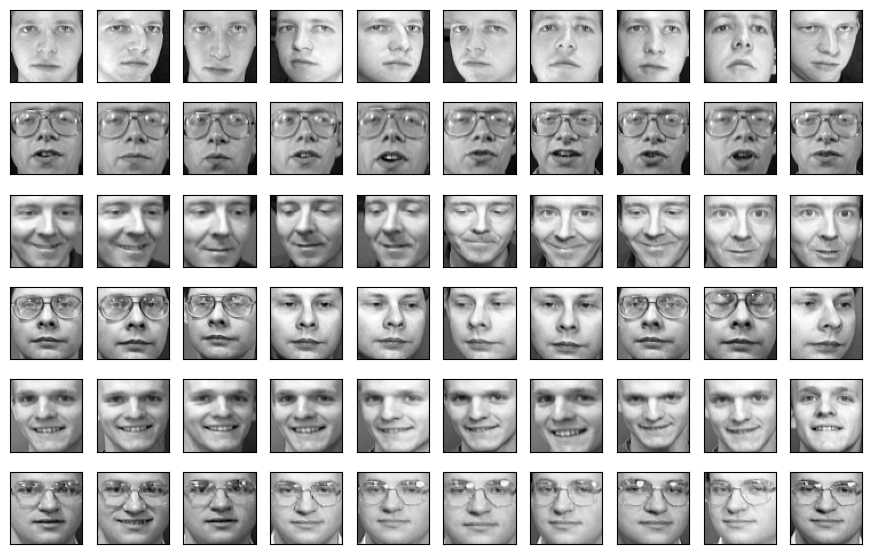

In [74]:
labels = df["target"]
pixels = df.drop(["target"],axis = 1)  #features

show_original_images(pixels)

In [62]:
# step 2: Split dataset into training and testing 
x_train,x_test,y_train,y_test = train_test_split(pixels,labels)

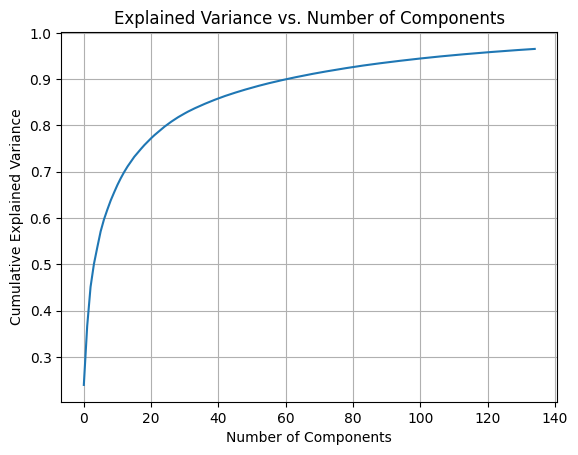

Number of components that explain at least 95% of the variance: 109
The eigenfaces of the dataset


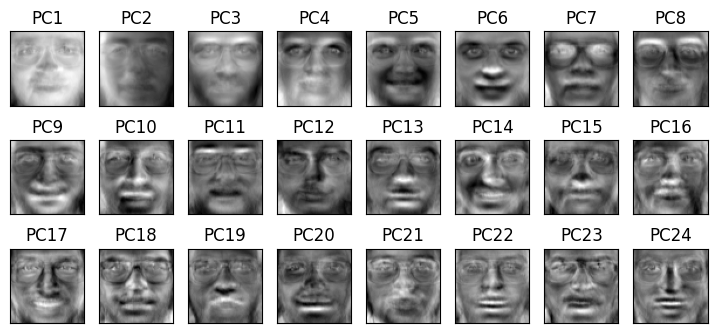

In [75]:
# step 3: Perform PCA
pca =PCA(n_components=135)
pca.fit(x_train)

# to select the exact number of components we should plot the cumulative explained variance ratio as a function of the number of components
# Plot cumulative explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()

# Choose the number of components that explain at least 95% of the variance
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(explained_variance_ratio >= 0.95) + 1
print(f"Number of components that explain at least 95% of the variance: {n_components}")

#display the eigenfaces
print("The eigenfaces of the dataset")  #it's given us the sence of alog wich directions do we have the maximum variance
show_eigenfaces(pca)


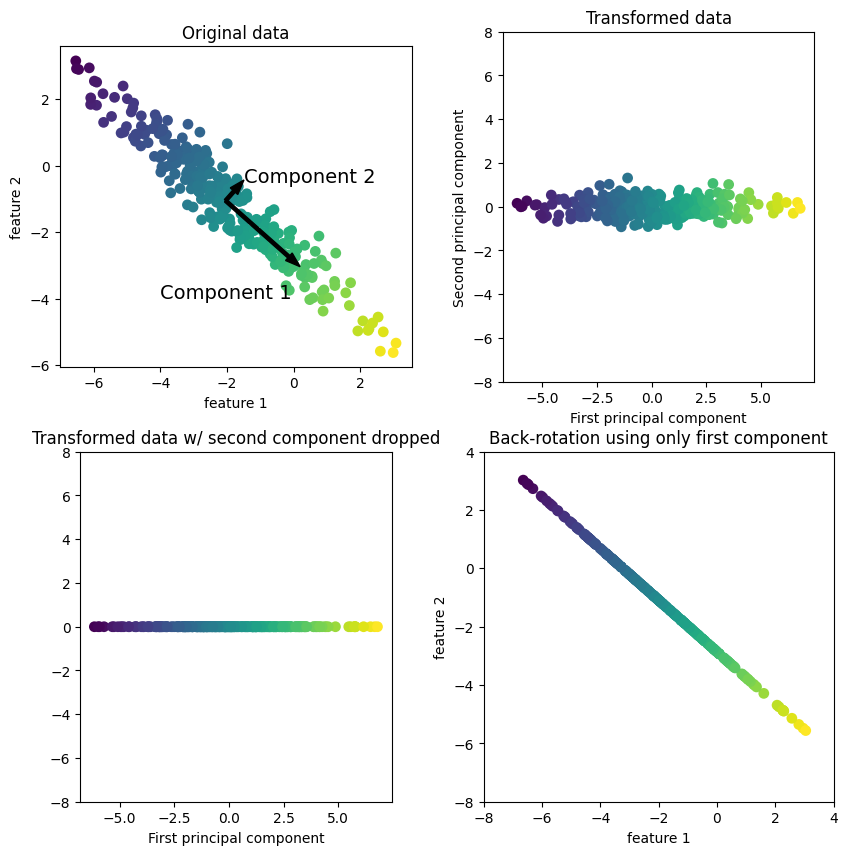

In [76]:
import mglearn as mgl

mgl.plots.plot_pca_illustration()


The above illustration shows a simple example on a synthetic two-dimensional data set. The first drawing shows the original data points colored to distinguish points. The algorithm first proceeds by finding the direction of the maximum variance labeled "Component 1". This refers to the direction in which most of the data is associated, or in other words, the properties that are most related to each other.

Then, when the algorithm is orthogonal (at right angle), it finds the direction that contains the most information in the first direction. There are only one possible orientation in two dimensions at a right angle, but there will be many orthogonal directions (infinite) in high dimensional spaces.

In [77]:
#step 4: Project Training data to PCA
x_train_pca = pca.transform(x_train)

In [66]:
#step 5: Initialize classifer and fit training data we will use SVM Classifier
clf = SVC(kernel='rbf',C=1000,gamma=0.01)  #non linear classifier rbf kernel
clf = clf.fit(x_train_pca,y_train)

In [78]:
# step 6 : Perform testing and get classification report
x_test_pca =pca.transform(x_test)

y_pred = clf.predict(x_test_pca)

print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3
           6       0.60      1.00      0.75         3
           7       1.00      0.50      0.67         4
           8       1.00      1.00      1.00         3
           9       0.50      0.50      0.50         2
          10       1.00      1.00      1.00         2
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         4
          15       1.00      0.67      0.80         6
          16       1.00      1.00      1.00         4
    

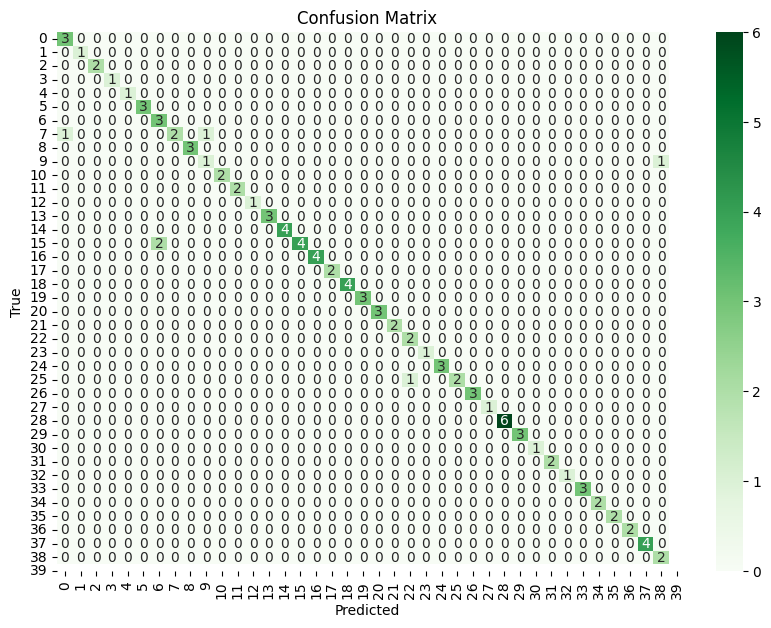

In [81]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', xticklabels=df["target"].unique(), yticklabels=df["target"].unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

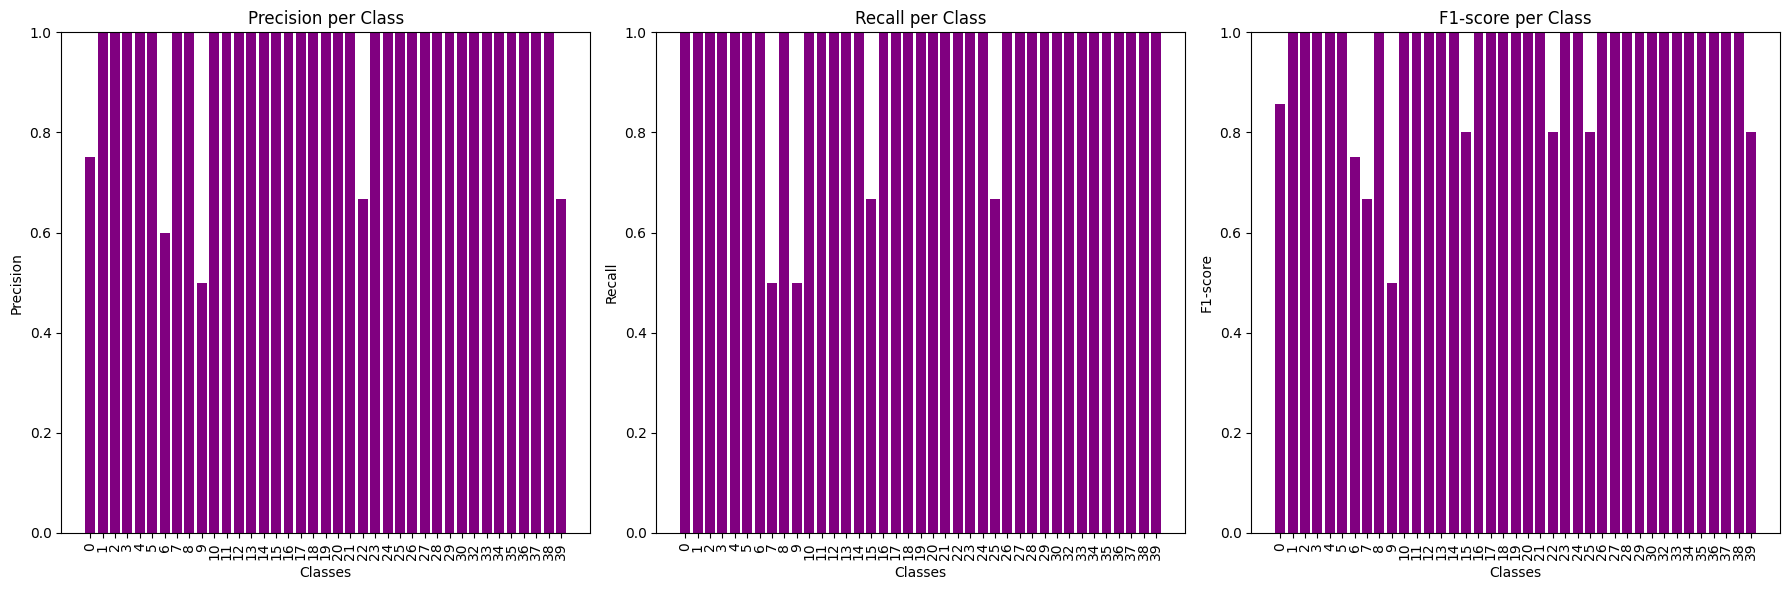

In [87]:
report = classification_report(y_test, y_pred, output_dict=True)

# Extract metrics for plotting
metrics = ['precision', 'recall', 'f1-score']
classes = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', 'weighted avg'

# Prepare data for plotting
data = {metric: [report[cls][metric] for cls in classes] for metric in metrics}

fig, ax = plt.subplots(1, 3, figsize=(18, 6))
for i, metric in enumerate(metrics):
    ax[i].bar(classes, data[metric], color='purple')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlabel('Classes')
    ax[i].set_ylabel(metric.capitalize())
    ax[i].set_title(f'{metric.capitalize()} per Class')
    ax[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()